In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#python'da uyarıları kapatalım
import warnings
warnings.filterwarnings("ignore")

#veriyi içeri aktaracağız
veri=pd.read_csv("olimpiyatlar_temizlenmis.csv")

Zaman Serilerinde Veri Analizi

    *   Yıllara göre ortalama yaş, boy ve kilo değişimi
    *   Yıllara göre madalya sayıları
       

In [3]:
#verinin orijinalinin bozulmaması için kopyalayalım
veri_zaman=veri.copy()
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [4]:
#Olimpiyatların gerçekleştiği yılları bulalım
essiz_yillar=veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [5]:
# yılları küçükten büyüğe sıralayalım
dizili_array=np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

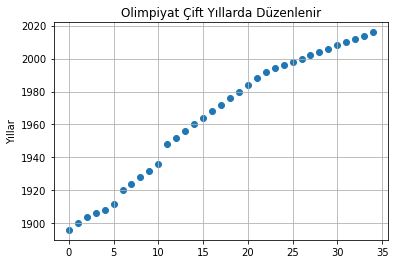

In [6]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyat Çift Yıllarda Düzenlenir")
plt.show()


In [7]:
# veri içerisinde bulunan yılları datetime veri tipine dönüştürelim
tarih_saat_nesnesi=pd.to_datetime(veri_zaman['yil'],format='%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


0   1900-01-01
1   1920-01-01
2   1920-01-01
Name: yil, dtype: datetime64[ns]

In [8]:
# veriye tarih saat diye yeni bir sütun açıp, bir önceki satırda elde ettiğimiz datetime veri tipini ekleyelim
veri_zaman["tarih_saat"]=tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [9]:
#tarih_saat sütununda bulunan datetime veri tipine ait veriyi, asıl verinin indeksi yapalım
#pandas kütüphanesinde indeksi veri tipi olan veri setleri ile çalışmak için özel yapılar bulunmaktadır.
# bu nedenle amacımız olan indeksi datetime veri tipi yapma çalışmamız gerçekleşmiş oluyor
veri_zaman=veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis=1,inplace=True)
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi

In [10]:
#2 yıllık periyotlar halinde ortalama değerleri al
periyodik_veri=veri_zaman.resample("2A").mean()
periyodik_veri.head()


,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [11]:
# kayıp verileri çıkart
periyodik_veri.dropna(axis=0,inplace=True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 432x288 with 0 Axes>

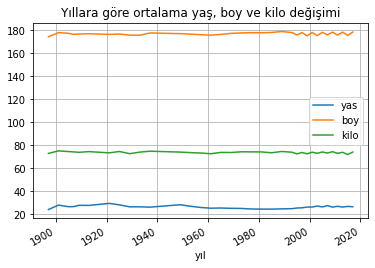

In [12]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara göre ortalama yaş, boy ve kilo değişimi")
plt.xlabel("yıl")
plt.grid(True)
plt.show()

Yıllara Göre Madalya Sayıları

In [13]:
veri_zaman=pd.get_dummies(veri_zaman,columns=['madalya'])
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [15]:
periyodik_veri=veri_zaman.resample("2A").sum() #2 yıllık periyotlar halinde ortalama değerleri al
periyodik_veri
#kayıp verileri çıkart
periyodik_veri=periyodik_veri[~(periyodik_veri==0).any(axis=1)]
periyodik_veri.tail()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


<Figure size 432x288 with 0 Axes>

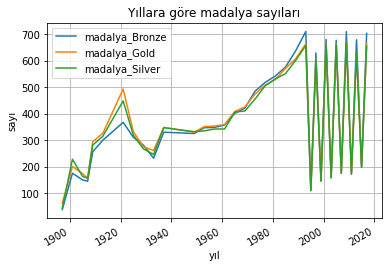

In [16]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları")
plt.ylabel("sayı")
plt.xlabel("yıl")
plt.grid(True)
plt.show()


In [17]:
#veriyi yaz ve kış olmak üzere ikiye ayıralım
yaz=veri_zaman[veri_zaman.sezon=="Summer"]
kis=veri_zaman[veri_zaman.sezon=="Winter"]
kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [18]:
#kış için
periyodik_veri_kis=kis.resample("A").sum()
#kayıp verileri çıkart
periyodik_veri_kis=periyodik_veri_kis[~(periyodik_veri_kis==0).any(axis=1)]
periyodik_veri_kis.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [19]:
#yaz için
periyodik_veri_yaz=yaz.resample("A").sum()
#kayıp verileri çıkart
periyodik_veri_yaz=periyodik_veri_yaz[~(periyodik_veri_yaz==0).any(axis=1)]
periyodik_veri_yaz.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0
1906-12-31,12127.56,80767.19,33925.06,145.0,157.0,156.0
1908-12-31,22907.96,146806.47,61262.24,256.0,294.0,281.0


<Figure size 432x288 with 0 Axes>

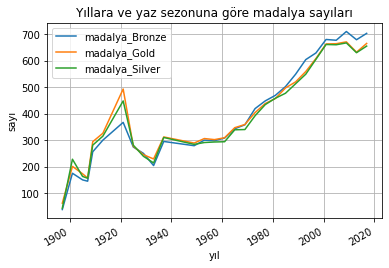

<Figure size 432x288 with 0 Axes>

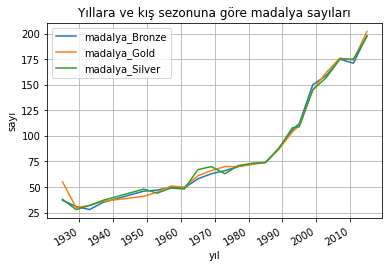

In [21]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara ve yaz sezonuna göre madalya sayıları")
plt.ylabel("sayı")
plt.xlabel("yıl")
plt.grid(True)
plt.show()

plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara ve kış sezonuna göre madalya sayıları")
plt.ylabel("sayı")
plt.xlabel("yıl")
plt.grid(True)
plt.show()
